<a href="https://colab.research.google.com/github/gautam-pai/BusinessAnalytics/blob/main/Product_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
import seaborn as sns

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df=pd.read_csv("new_retail_data.csv")

In [ ]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [ ]:
df_cleaned=df.dropna()

In [ ]:
df_select=df_cleaned[["Product_Category","Product_Brand","Product_Type","Amount","Ratings","Feedback"]]

In [ ]:
df_select.isna().sum()

Product_Category    0
Product_Brand       0
Product_Type        0
Amount              0
Ratings             0
Feedback            0
dtype: int64

In [ ]:
df_select.columns


Index(['Product_Category', 'Product_Brand', 'Product_Type', 'Amount',
       'Ratings', 'Feedback'],
      dtype='object')

In [ ]:
df_select["Feedback"].unique()

array(['Excellent', 'Average', 'Bad', 'Good'], dtype=object)

In [ ]:
Product_Catergory_Mapping={'Clothing': 1, 'Electronics': 2, 'Books': 3, 'Home Decor': 4, 'Grocery': 5}
Product_Brand_Mapping={'Nike':1, 'Samsung':2, 'Penguin Books':3, 'Home Depot':4, 'Nestle':5,
                       'Apple':6, 'Zara':7, 'Random House':8, 'Coca-Cola':9, 'Adidas':10, 'Pepsi':11,
                       'IKEA':12, 'HarperCollins':13, 'Bed Bath & Beyond':14, 'Sony':15, 'Whirepool':16,
                       'Mitsubhisi':17, 'BlueStar':18}
Product_Type_Mapping={'Shorts': 1,'Tablet': 2,"Children's": 3,'Tools': 4,'Chocolate': 5,'Television': 6,
                      'Shirt': 7,'Decorations': 8,'Non-Fiction': 9,'Water': 10,'Snacks': 11,'T-shirt': 12,
                      'Literature': 13,'Juice': 14,'Furniture': 15,'Coffee': 16,'Bathroom': 17,'Kitchen': 18,
                      'Smartphone': 19,'Shoes': 20,'Thriller': 21,'Soft Drink': 22,'Laptop': 23,'Dress': 24,
                      'Headphones': 25,'Lighting': 26,'Bedding': 27,'Jacket': 28,'Fiction': 29,'Jeans': 30,
                      'Fridge': 31,'Mitsubishi 1.5 Ton 3 Star Split AC': 32,'BlueStar AC': 33}
Feedback_Mapping={'Bad': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}

In [ ]:
df_select['Product_Category_Encoded']=df_select["Product_Category"].replace(Product_Catergory_Mapping)
df_select['Product_Brand_Encoded']=df_select["Product_Brand"].replace(Product_Brand_Mapping)
df_select['Product_Type_Encoded']=df_select["Product_Type"].replace(Product_Type_Mapping)
df_select['Feedback_Encoded']=df_select["Feedback"].replace(Feedback_Mapping)

C:\Users\gauta\AppData\Local\Temp\ipykernel_15364\4189037522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_select['Product_Category_Encoded']=df_select["Product_Category"].replace(Product_Catergory_Mapping)
C:\Users\gauta\AppData\Local\Temp\ipykernel_15364\4189037522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Product_Category_Encoded']=df_select["Product_Category"].replace(Product_Catergory_Mapping)
C:\Users\gauta\AppData\Local\Temp\ipykernel_15364\4189037522.py:2: FutureWarning: Downcastin

In [ ]:
df_select.head(5)

,Product_Category,Product_Brand,Product_Type,Amount,Ratings,Feedback,Product_Category_Encoded,Product_Brand_Encoded,Product_Type_Encoded,Feedback_Encoded
0,Clothing,Nike,Shorts,108.028757,5.0,Excellent,1,1,1,4
1,Electronics,Samsung,Tablet,403.353907,4.0,Excellent,2,2,2,4
2,Books,Penguin Books,Children's,354.477600,2.0,Average,3,3,3,2
3,Home Decor,Home Depot,Tools,352.407717,4.0,Excellent,4,4,4,4
4,Grocery,Nestle,Chocolate,124.276524,1.0,Bad,5,5,5,1


In [ ]:
df_select=df_select[["Product_Category_Encoded",
                     "Product_Brand_Encoded",
                     "Product_Type_Encoded",
                     "Amount",
                     "Ratings",
                     "Feedback_Encoded"]]

In [ ]:
df_select.head(5)

,Product_Category_Encoded,Product_Brand_Encoded,Product_Type_Encoded,Amount,Ratings,Feedback_Encoded
0,1,1,1,108.028757,5.0,4
1,2,2,2,403.353907,4.0,4
2,3,3,3,354.477600,2.0,2
3,4,4,4,352.407717,4.0,4
4,5,5,5,124.276524,1.0,1


In [ ]:
#df_select["Amount"]=scaler.fit_transform(df_select[["Amount"]])
scaled_df= StandardScaler().fit_transform(df_select)

In [ ]:
scaled_df[:5]

array([[-1.42211898, -1.65701294, -1.6875353 , -1.04057036,  1.39139588,
         1.11259507],
       [-0.71973678, -1.43906955, -1.57479059,  1.04818095,  0.6342557 ,
         1.11259507],
       [-0.01735457, -1.22112617, -1.46204588,  0.70249264, -0.88002466,
        -0.8037767 ],
       [ 0.68502763, -1.00318278, -1.34930116,  0.68785295,  0.6342557 ,
         1.11259507],
       [ 1.38740984, -0.78523939, -1.23655645, -0.92565449, -1.63716484,
        -1.76196259]])

In [ ]:
kmeans_kwargs={
    "init":"random",
    "n_init":10,
    "random_state":1,
}

sse=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

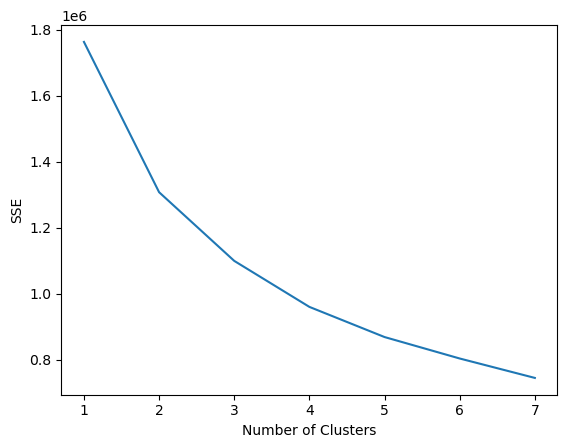

In [ ]:
plt.plot(range(1,8),sse)
plt.xticks(range(1,8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# the ideal elbow points seem to be 3,4

In [ ]:
## kmeans=KMeans(init="random",n_clusters=3,n_init=10,random_state=1)
kmeans.fit(scaled_df)
df_select["Cluster"]=kmeans.labels_
df_select.head(5)

,Product_Category_Encoded,Product_Brand_Encoded,Product_Type_Encoded,Amount,Ratings,Feedback_Encoded,Cluster
0,1,1,1,108.028757,5.0,4,1
1,2,2,2,403.353907,4.0,4,1
2,3,3,3,354.477600,2.0,2,2
3,4,4,4,352.407717,4.0,4,1
4,5,5,5,124.276524,1.0,1,2


## 2D Plotting

#### 1. Basic Cluster Distribution

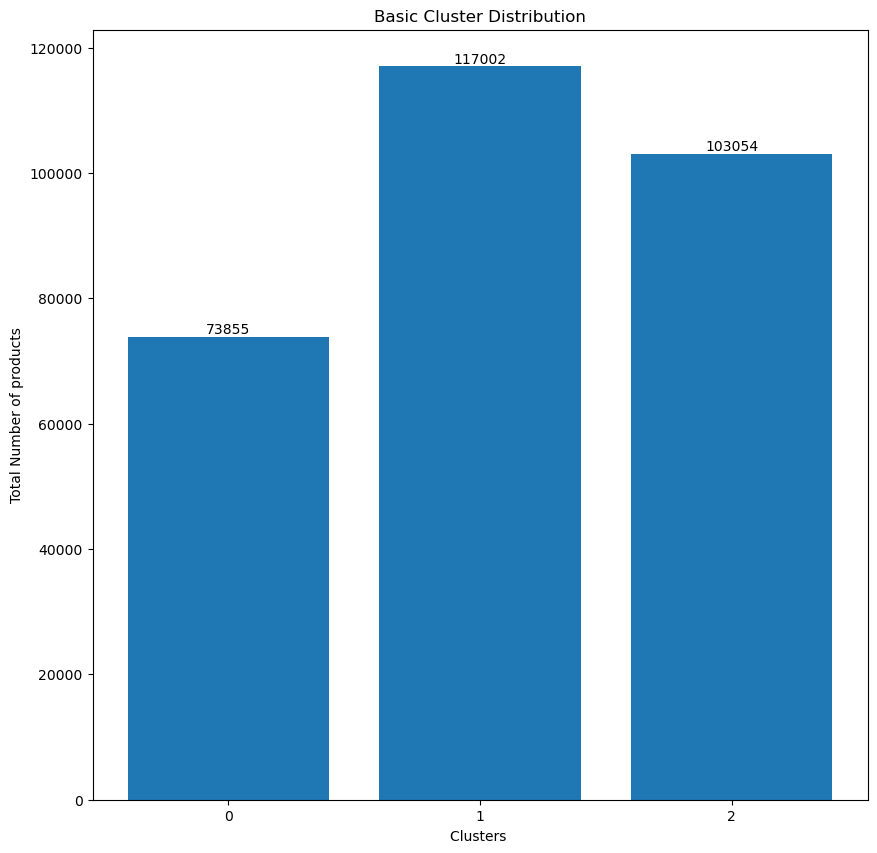

In [ ]:
plt.figure(figsize=(10, 10))
df_bcf=df_select.groupby(df_select["Cluster"]).agg({"Product_Brand_Encoded":"count"})
df_bcf["Cluster"]=df_bcf.index
BarContainer=plt.bar(x=df_bcf["Cluster"],height=df_bcf["Product_Brand_Encoded"])
plt.title("Basic Cluster Distribution")
plt.xticks(ticks=[0,1,2])
plt.xlabel("Clusters ")
plt.ylabel("Total Number of products")
plt.bar_label(container=BarContainer)
plt.savefig("1. Basic Cluster Distribution.png")
plt.show()

#### 2. Cluster Distribution by Product Categories

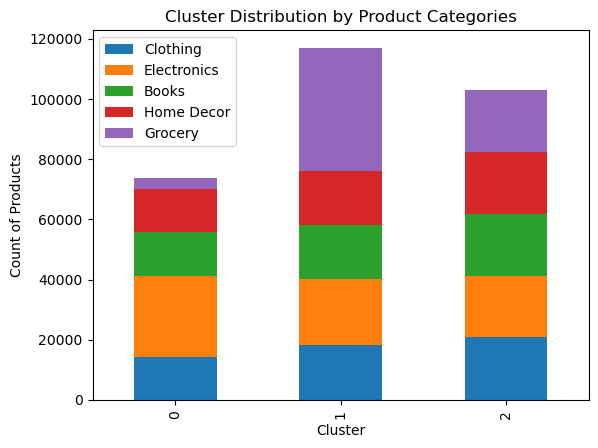

In [ ]:
#plt.figure(figsize=(10,10))
df_cdpc=df_select.groupby(["Cluster","Product_Category_Encoded"]).size().reset_index(name="Count")
pivot_table = df_cdpc.pivot(index='Cluster', columns='Product_Category_Encoded', values='Count',)
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count of Products')
plt.legend({'Clothing': 1, 'Electronics': 2, 'Books': 3, 'Home Decor': 4, 'Grocery': 5})
plt.title('Cluster Distribution by Product Categories')
plt.savefig("2. Cluster Distribution by Product Categories.png")
plt.show()


#### 3. Cluster Analysis by Price (Amount) and Ratings   ---NOt good

<Figure size 1000x1000 with 0 Axes>

D:\AppInstallationBin\Anaconda\NewFolder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


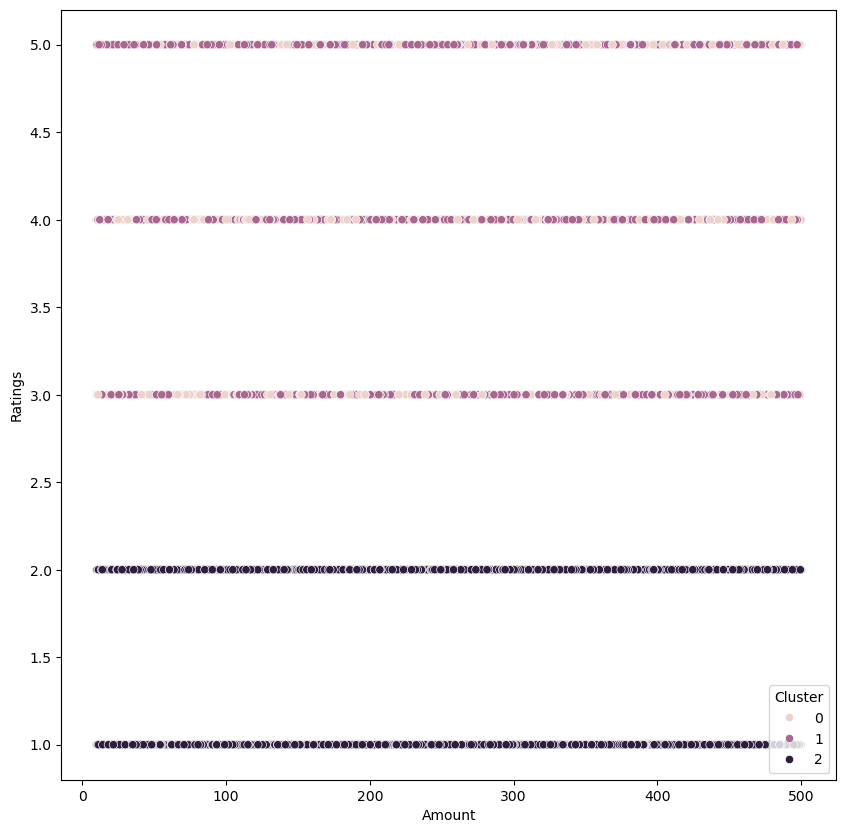

In [ ]:
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))
sns.scatterplot(
    x=df_select["Amount"],
    y=df_select["Ratings"],
    hue=df_select["Cluster"]
)


plt.show()


#### 3. Correlation between Feedback and Pricing   ------NOt good

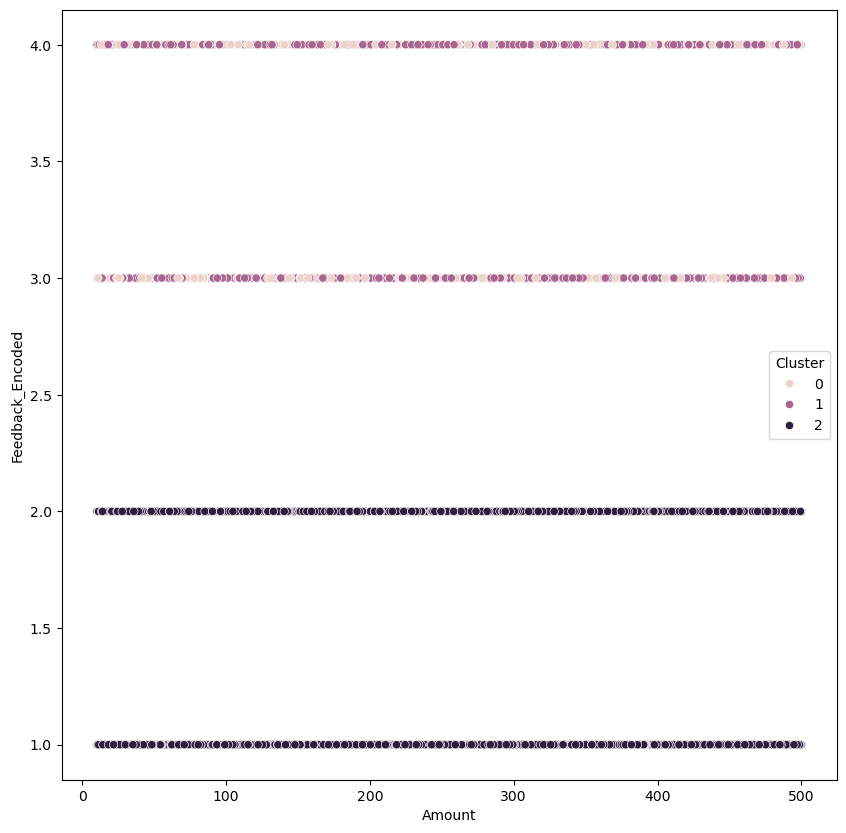

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=df_select["Amount"],
    y=df_select["Feedback_Encoded"],
    hue=df_select["Cluster"]
)


plt.show()

#### Cluster-wise Mean comparisons

In [ ]:
cluster_means = df_select.groupby('Cluster')[['Amount', 'Ratings']].mean().reset_index()
cluster_means


,Cluster,Amount,Ratings
0,0,254.736208,4.006648
1,1,255.321170,4.013572
2,2,255.261644,1.590700


#### Product Category Performance Analysis

In [ ]:
df_pcpa=df_cleaned.groupby(["Product_Category"]).agg({"Total_Amount":["sum","mean"],"Ratings":["mean","median"]})
df_pcpa

# Electronics Product Category generates the most revenue(95.01m $), home decore generates the lowest revenue(72.34m $)
# Electronics Product Category has the highest customer satisfaction(average= 3.27, median= 4), whereas Clothing has the lowest customer satisfaction(average=3.11, median= 3)


Total_Amount                Ratings       
                           sum         mean      mean median
Product_Category                                            
Books             7.272673e+07  1367.069440  3.110641    3.0
Clothing          7.293347e+07  1368.820004  3.103074    3.0
Electronics       9.501178e+07  1369.736547  3.269603    4.0
Grocery           8.896615e+07  1366.061942  3.181894    3.0
Home Decor        7.234013e+07  1366.480831  3.109126    3.0

#### Popular Product Categories by Revenue

In [ ]:
df_ppcr=df_cleaned.groupby(["Product_Category","Product_Type"]).agg({"Total_Amount":"sum","Ratings":"mean"})
df_ppcr

Total_Amount   Ratings
Product_Category Product_Type                                              
Books            Children's                          8.041021e+06  3.118090
                 Fiction                             2.406426e+07  3.102770
                 Literature                          8.150580e+06  3.129978
                 Non-Fiction                         2.414902e+07  3.110627
                 Thriller                            8.321845e+06  3.107330
Clothing         Dress                               8.091461e+06  3.086650
                 Jacket                              7.890771e+06  3.118222
                 Jeans                               8.146933e+06  3.067885
                 Shirt                               8.105353e+06  3.138539
                 Shoes                               1.625334e+07  3.091802
                 Shorts                              8.190797e+06  3.095948
                 T-shirt                             1.625482e+07  3.118524
Electronics      BlueStar AC                         2.992519e+06  4.398098
                 Fridge                              9.884276e+06  3.466456
                 Headphones                          8.180918e+06  3.119209
                 Laptop                              7.949464e+06  3.098676
                 Mitsubishi 1.5 Ton 3 Star Split AC  9.008944e+06  3.879483
                 Smartphone                          2.470776e+07  3.123766
                 Tablet                              1.605443e+07  3.123192
                 Television                          1.623346e+07  3.124726
Grocery          Chocolate                           8.114278e+06  3.101351
                 Coffee                              8.198729e+06  3.107000
                 Juice                               1.616060e+07  3.113181
                 Snacks                              7.764341e+06  3.127340
                 Soft Drink                          1.596763e+07  3.119928
                 Water                               3.276057e+07  3.298683
Home Decor       Bathroom                            8.075123e+06  3.122218
                 Bedding                             7.911124e+06  3.105407
                 Decorations                         1.616089e+07  3.105703
                 Furniture                           1.589060e+07  3.112929
                 Kitchen                             8.289121e+06  3.112730
                 Lighting                            8.046620e+06  3.111262
                 Tools                               7.966652e+06  3.093047

In [ ]:
df_ppcr_max = df_ppcr.loc[df_ppcr.groupby("Product_Category")["Total_Amount"].idxmax()]
df_ppcr_max

,,Total_Amount,Ratings
Product_Category,Product_Type,,
Books,Non-Fiction,2.414902e+07,3.110627
Clothing,T-shirt,1.625482e+07,3.118524
Electronics,Smartphone,2.470776e+07,3.123766
Grocery,Water,3.276057e+07,3.298683
Home Decor,Decorations,1.616089e+07,3.105703
